#Link to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Data_CS114/News_header'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Crawl web


##Preprocess

###Setup & library

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 8.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelea

In [3]:
from selenium.webdriver.common.by import By
import sys
import json

In [4]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)


WebDriverException: ignored

###Data storage

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful for collecting supplementary data

In [ ]:
news_data={
    'is_sarcastic':[],
    'headline':[],
    'article_link':[]
}

In [ ]:
Test_data={
    'is_sarcastic':[],
    'headline':[],
    'article_link':[]
}

## Tuổi Trẻ Cười

In [ ]:
tuoitrecuoi=["https://cuoi.tuoitre.vn/lau-thap-cam.htm",
             "https://cuoi.tuoitre.vn/tin-tuc-cuoi.htm",
             "https://cuoi.tuoitre.vn/biem-hoa.htm",
             "https://cuoi.tuoitre.vn/doi-cuoi.htm",
             ]

In [ ]:
for links in tuoitrecuoi:
  wd.get(links)
  button_read_more = wd.find_elements(By.CLASS_NAME, "readmore")[0]
  print("Process in link: ",links)

  for i in range(0,10):
    try:
      print("Process ",i+1)
      button_read_more.click()
      wait = WebDriverWait(wd, 10)
      wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'readmore')))
    except:
      print("Can't find next button")
    # Lấy title từng links
    page_section = wd.find_elements(By.CSS_SELECTOR, "section.page-section")
    article_tags = page_section[2].find_elements(By.TAG_NAME, "article")
    for tag in article_tags:
      try:
        a_tag = tag.find_element(By.TAG_NAME,"a")
        title = a_tag.get_attribute('title')
        link = a_tag.get_attribute('href')
      except:
        print("Can't catch title in process ", i+1)
      if title:
        news_data['is_sarcastic'].append(1)
        news_data['headline'].append(title)
        news_data['article_link'].append(link)

Process in link:  https://cuoi.tuoitre.vn/lau-thap-cam.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10
Process in link:  https://cuoi.tuoitre.vn/tin-tuc-cuoi.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10
Process in link:  https://cuoi.tuoitre.vn/biem-hoa.htm
Process  1
Can't catch title in process  1
Process  2
Can't catch title in process  2
Process  3
Can't catch title in process  3
Process  4
Can't catch title in process  4
Process  5
Can't catch title in process  5
Process  6
Can't catch title in process  6
Process  7
Can't catch title in process  7
Process  8
Can't catch title in process  8
Process  9
Can't catch title in process  9
Process  10
Can't catch title in process  10
Process in link:  https://cuoi.tuoitre.vn/doi-cuoi.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10


In [ ]:
len(news_data['headline'])

2671

##Vnexpress


In [ ]:
vnexpress=['https://vnexpress.net/the-gioi',
           'https://vnexpress.net/thoi-su',
           'https://vnexpress.net/kinh-doanh',
           'https://vnexpress.net/suc-khoe']

In [ ]:
for links in vnexpress:
  for i in range(0,5):
    #tạo đường dẫn + -số trang
    new_link = links + '-p' +str(i+1)
    print("Process in link: ",new_link)
    wd.get(new_link)
    
    # Lấy title từng links
    page_section = wd.find_elements(By.CSS_SELECTOR, "section.section")
    article_tags = page_section[5].find_elements(By.TAG_NAME, "article")
    for tag in article_tags:
      try:
        a_tag = tag.find_element(By.TAG_NAME,"a")
        title = a_tag.get_attribute('title')
        link = a_tag.get_attribute('href')
        if title:
          news_data['is_sarcastic'].append(0)
          news_data['headline'].append(title)
          news_data['article_link'].append(link)
      except:
        print("Can't catch title in process ")


Process in link:  https://vnexpress.net/the-gioi-p1
Process in link:  https://vnexpress.net/the-gioi-p2
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Process in link:  https://vnexpress.net/the-gioi-p3
Process in link:  https://vnexpress.net/the-gioi-p4
Process in link:  https://vnexpress.net/the-gioi-p5
Process in link:  https://vnexpress.net/thoi-su-p1
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Process in link:  https://vnexpress.net/thoi-su-p2
Process in link:  https://vnexpress.net/thoi-su-p3
Process in link:  https://vnexpress.net/thoi-su-p4
Process in link:  https://vnexpress.net/thoi-su-p5
Process in link:  https://vnexpress.net/kinh-doanh-p1
Process in link:  https://vnexpress.net/kinh-doanh-p2
Process in link:  https://vnexpress.net/kinh-doanh-p3
Process in link:  https://vnexpress.net/kinh-doanh-p4
Process in link:  https://vne

In [ ]:
len(news_data['headline'])

3437

##Kênh 14


In [ ]:
kenh14=['https://kenh14.vn/doi-song.chn']

In [ ]:
test_data={
    'is_sarcastic':[],
    'headline':[],
    'article_link':[]
}

In [ ]:
for links in kenh14:
    print("Process in link: ",links)
    wd.get(links)
    # Lấy title từng links
  
    data = wd.find_elements(By.CSS_SELECTOR, "ul.knsw-list")
    h3_data = data.find_elements(By.CLASS_NAME, "knswli-title")
    for tag in article_tags:
      try:
        a_tag = h3_data.find_element(By.TAG_NAME,"a")
        title = a_tag.get_attribute('title')
        link = a_tag.get_attribute('href')
        if title:
          test_data['is_sarcastic'].append(0)
          test_data['headline'].append(title)
          test_data['article_link'].append(link)
      except:
        print("Can't catch title in process ")


In [ ]:
data = wd.find_elements(By.CSS_SELECTOR, "ul.knsw-list")

##Create data file

In [ ]:
def write_json(headlines, is_sarcatic, article_link):
  aDict = {
        "is_sarcastic": is_sarcatic,
        "headline": headlines,
        "article_link": article_link
    }
  jsonString = json.dumps(aDict, ensure_ascii = False, indent = 1, separators=(',', ': '))
  print(jsonString)
  jsonFile = open("/content/drive/MyDrive/Data_CS114/sarcasm_data_2.json", "a", encoding="utf8")
  jsonFile.write(jsonString)
  jsonFile.close()
  

In [ ]:
for i in range(0,len(news_data['headline'])):
  print('Process data ',i)
  write_json(news_data['headline'][i],news_data['is_sarcastic'][i],news_data['article_link'][i])

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 "article_link": "https://cuoi.tuoitre.vn/su-tich-son-tinh-thuy-tinh-va-ly-do-tien-dien-cao-2021063015033315.htm"
}
Process data  2604
{
 "is_sarcastic": 1,
 "headline": "Ca khúc khuyến khích và không khuyến khích hát khi có dịch Covid-19",
 "article_link": "https://cuoi.tuoitre.vn/ca-khuc-khuyen-khich-va-khong-khuyen-khich-hat-khi-co-dich-covid-19-2021062739073415.htm"
}
Process data  2605
{
 "is_sarcastic": 1,
 "headline": "Gia đình Mai An Tiêm được mời đi tiêm vaccine",
 "article_link": "https://cuoi.tuoitre.vn/gia-dinh-mai-an-tiem-duoc-moi-di-tiem-vaccine-2021062493515601.htm"
}
Process data  2606
{
 "is_sarcastic": 1,
 "headline": "Thanh niên đi Bình Dương lập nghiệp, khiến 300 người phải cách ly",
 "article_link": "https://cuoi.tuoitre.vn/thanh-nien-di-binh-duong-lap-nghiep-khien-300-nguoi-phai-cach-ly-2021062418768151.htm"
}
Process data  2607
{
 "is_sarcastic": 1,
 "headline": "Chí Phèo hăm hở hẹn hò mặc dịch ùn ùn kéo đế

In [ ]:
len(news_data['headline'])

3437

#Process


In [ ]:
#setup library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_json('/content/drive/MyDrive/Data_CS114/News_header /news_headline.json')

In [ ]:
data.head()

,is_sarcastic,headline,article_link
0,1,"Mua 1,9 triệu chuyển khoản nhầm 1,9 tỉ - Người...",https://cuoi.tuoitre.vn/mua-1-9-trieu-chuyen-k...
1,1,Thử thách IQ: Đồng xu trong thùng nào chạm đáy...,https://cuoi.tuoitre.vn/thu-thach-iq-dong-xu-t...
2,1,Ảnh vui 9-12: Chú ếch làm bài toán 'phải bán b...,https://cuoi.tuoitre.vn/anh-vui-9-12-chu-ech-l...
3,1,Có gì sai sót trong tiệc sinh nhật?,https://cuoi.tuoitre.vn/co-gi-sai-sot-trong-ti...
4,1,Ai là chủ của chú chó đang đợi ngoài cửa?,https://cuoi.tuoitre.vn/ai-la-chu-cua-chu-cho-...


In [ ]:
df = data.drop('article_link',axis  = 1)

In [ ]:
df.head()

,is_sarcastic,headline
0,1,"Mua 1,9 triệu chuyển khoản nhầm 1,9 tỉ - Người..."
1,1,Thử thách IQ: Đồng xu trong thùng nào chạm đáy...
2,1,Ảnh vui 9-12: Chú ếch làm bài toán 'phải bán b...
3,1,Có gì sai sót trong tiệc sinh nhật?
4,1,Ai là chủ của chú chó đang đợi ngoài cửa?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  3896 non-null   int64 
 1   headline      3896 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.0+ KB


In [ ]:
df.isnull().sum()

is_sarcastic    0
headline        0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


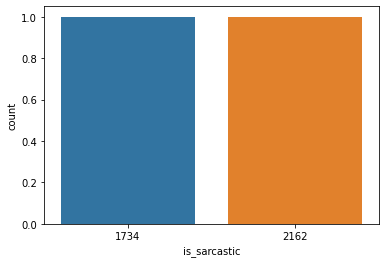

In [ ]:
sns.countplot(df['is_sarcastic'].value_counts())

In [ ]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha()]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [ ]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

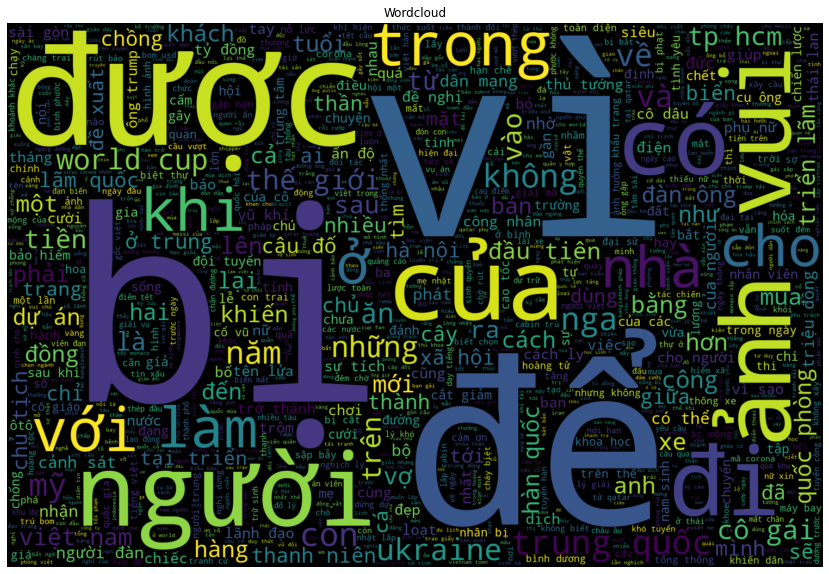

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X = df.clean_text
y = df.is_sarcastic

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [ ]:
X_train.head()

1151    cô gái không dám ra ngoài ban ngày vì yêu bạn ...
2404              hà nội phát sinh điểm ùn tắc giao thông
1053         cựu xạ thủ bắn tỉa israel dùng súng vẽ tranh
3235    ông zelensky kêu gọi người dân kiên cường tron...
22      cuộc sống bế tắc vì bạn cùng phòng tháng không...
Name: clean_text, dtype: object

In [ ]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)